# JAY BAKSHI : UB ID - 50206954

---
We will be working with the NHL Top 100 players data set.<br/>
The 2 variables we will relate are <code>Goals</code> and <code>Assists</code> for each of these players in the dataset.<br/>

Target: Fit a linear(regression) model on the data visualized as -
<li><code>Assists</code> on Y-axis
<li><code>Goals</code> on X-axis
</li>

---

In [1]:
data <- read.csv("datasets/NHLTop100.csv")
head(data)

Rank,Player,Team,Pos,X1st.NHL.Season,Last.NHL.Season,GP,G,A,P,X...,PIM,PP,SH,GW,GT,OT,Shots
1,Wayne Gretzky,,C,1979-1980,1998-1999,1487,894,1963,2857,518,577,204,73,91,12,1,5089
2,Mark Messier,,C,1979-1980,2003-2004,1756,694,1193,1887,210,1910,179,63,92,15,7,4219
3,Gordie Howe,,R,1946-1947,1979-1980,1767,801,1049,1850,87,1685,39,5,18,NA,NA,NA
4,Ron Francis,,C,1981-1982,2003-2004,1731,549,1249,1798,-10,979,188,12,79,13,3,3754
5,Marcel Dionne,,C,1971-1972,1988-1989,1348,731,1040,1771,28,600,234,19,74,1,2,5366
6,Steve Yzerman,,C,1983-1984,2005-2006,1514,692,1063,1755,202,924,202,50,94,12,8,4602


In [2]:
install.packages("ggplot2", repos="https://cran.r-project.org")

Installing package into 'C:/Users/Jay/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Jay\AppData\Local\Temp\RtmpQ7Wiog\downloaded_packages


In [3]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.3.3"

#### Scatter plotting the Goals vs. Assists data with default values.

In [7]:
default.plot <- ggplot(data, aes(x = G,y = A)) + 
    geom_point(aes(color = GP, size = G)) + 
    scale_color_gradient(low = "red",  high = "blue")

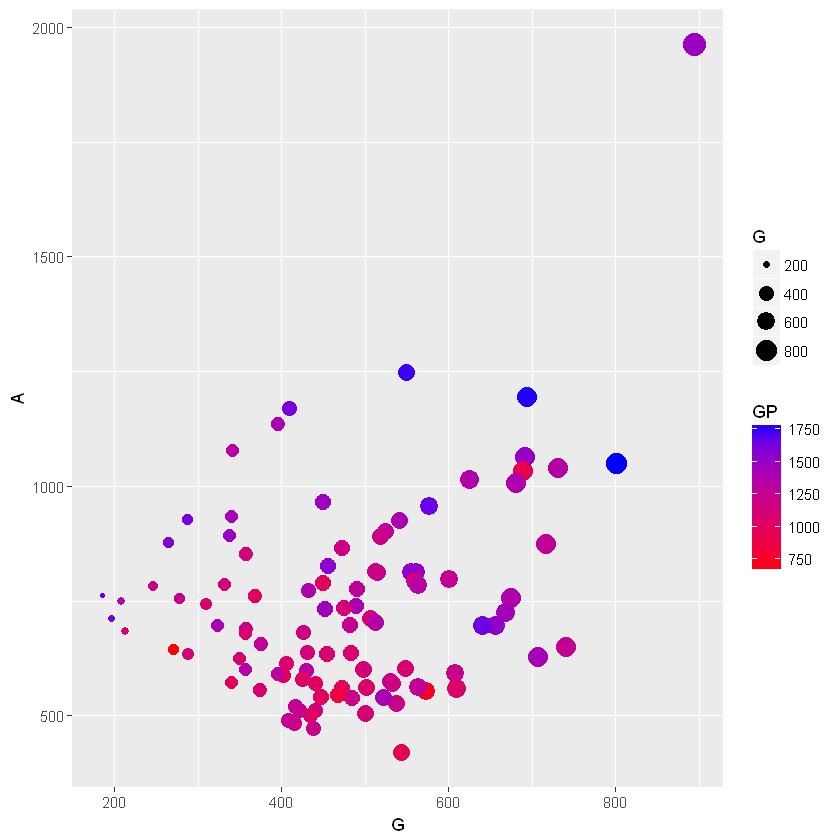

In [8]:
default.plot

#### Adding the linear regression model to the above plot points

In [9]:
default.lm.plot <- ggplot(data, aes(x = G,y = A)) + 
    geom_point(aes(color = GP, size = G)) + 
    scale_color_gradient(low = "red",  high = "blue") +
    geom_smooth(method = "lm")

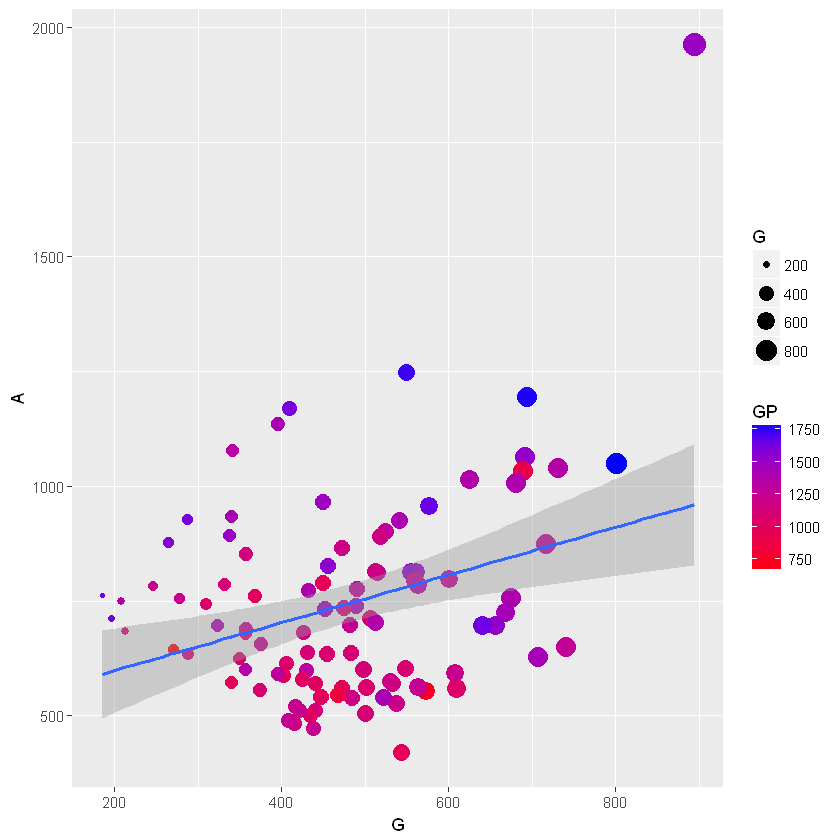

In [10]:
default.lm.plot

#### Above is the intial / default fit.
#### Now onto finding evaluating the fit by noting R<sup>2</sup> and p-values of the fit.

In [11]:
default.model <- lm(A ~ G, data = data)

In [12]:
names(default.model)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [13]:
default.model


Call:
lm(formula = A ~ G, data = data)

Coefficients:
(Intercept)            G  
   494.5135       0.5202  


#### Getting the intercept and slope values

In [15]:
default.coefs <- coef(default.model)

In [16]:
default.coefs[1]
default.coefs[2]

(Intercept) 
   494.5135

G 
0.5202063

#### Plotting the new line wrt intercept and slope only

In [19]:
default.fit.plot <- default.lm.plot + geom_abline(intercept = coefs[1], slope = coefs[2])

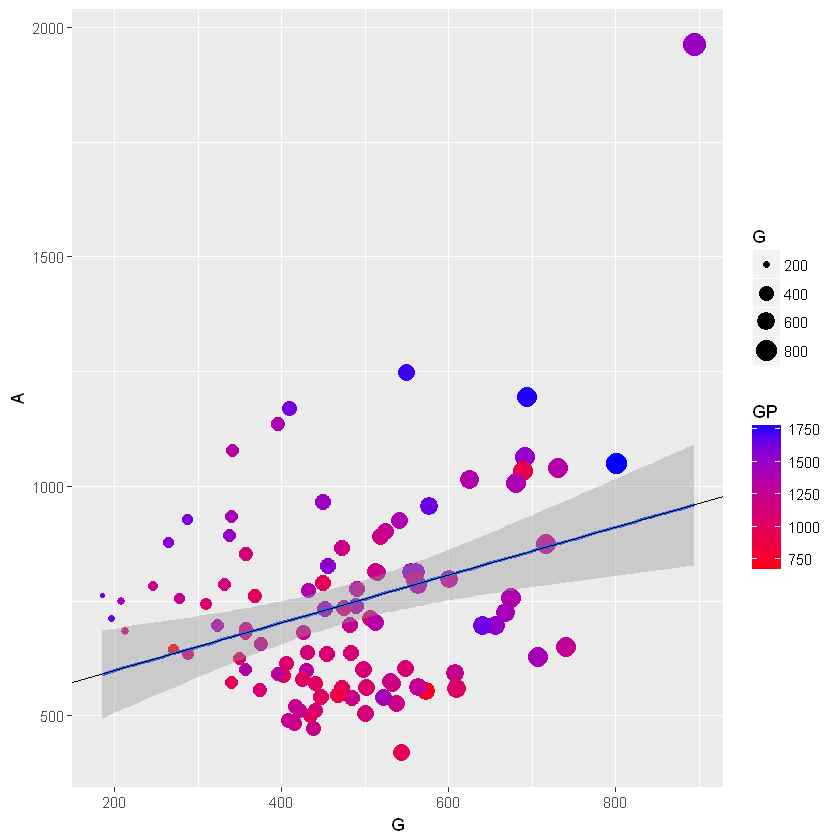

In [20]:
default.fit.plot

#### Getting the Rsquared and p-values

In [21]:
summary(default.model)


Call:
lm(formula = A ~ G, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-356.51 -158.59  -10.29  125.08 1003.42 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 494.5135    74.6410   6.625 1.88e-09 ***
G             0.5202     0.1508   3.449 0.000832 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 207 on 98 degrees of freedom
Multiple R-squared:  0.1082,	Adjusted R-squared:  0.09913 
F-statistic: 11.89 on 1 and 98 DF,  p-value: 0.0008317


In [22]:
default.r2 <- summary(default.model)$r.squared

In [23]:
default.r2

[1] 0.1082305

In [24]:
default.fstat <- summary(default.model)$fstatistic

In [26]:
default.p <- pf(default.fstat[1], default.fstat[2], default.fstat[3], lower.tail = FALSE)

In [27]:
default.p

value 
0.0008317169

#### Fitting the above plot to go through Wayne Gretsky (894, 1963)

In [28]:
gretsky.model <- lm(I(A - 1963) ~ I(G - 894), data = data)

In [29]:
gretsky.model


Call:
lm(formula = I(A - 1963) ~ I(G - 894), data = data)

Coefficients:
(Intercept)   I(G - 894)  
 -1003.4220       0.5202  


In [30]:
gretsky.coefs <- coef(gretsky.model)

In [31]:
gretsky.coefs[1]
gretsky.coefs[2]

(Intercept) 
  -1003.422

I(G - 894) 
 0.5202063

In [33]:
gretsky.fit.plot <- default.lm.plot + 
    geom_abline(intercept = (1963 - (gretsky.coefs[2]*894)), slope = gretsky.coefs[2])

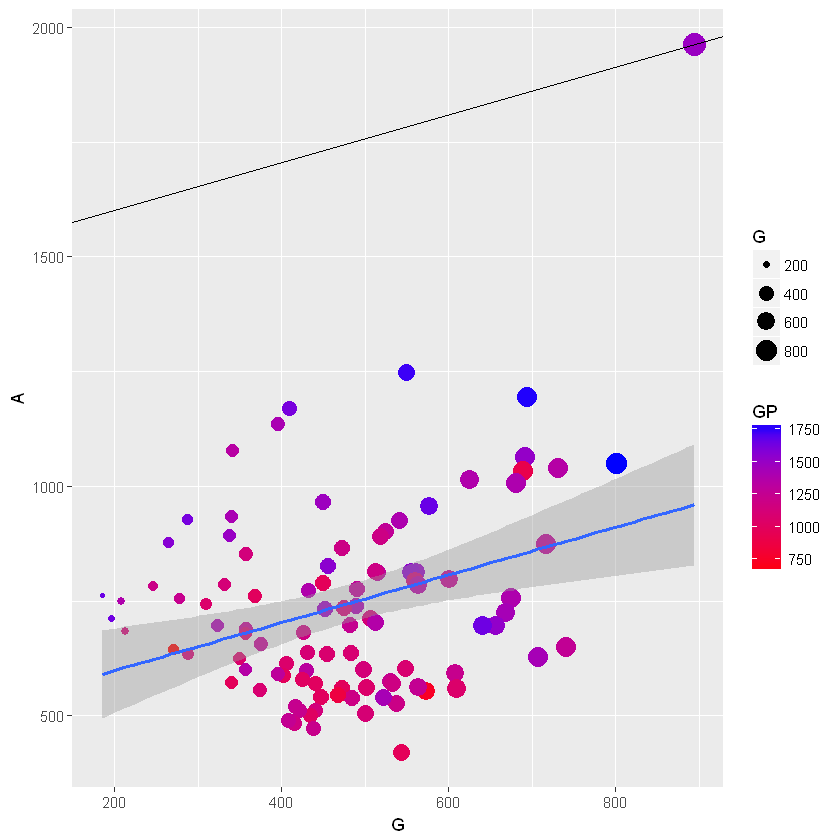

In [34]:
gretsky.fit.plot

#### Getting the Rsquared and pvalues for new Model passing through Wayne Gretsky

In [35]:
summary(gretsky.model)


Call:
lm(formula = I(A - 1963) ~ I(G - 894), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-356.51 -158.59  -10.29  125.08 1003.42 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1003.4220    66.4463 -15.101  < 2e-16 ***
I(G - 894)      0.5202     0.1508   3.449 0.000832 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 207 on 98 degrees of freedom
Multiple R-squared:  0.1082,	Adjusted R-squared:  0.09913 
F-statistic: 11.89 on 1 and 98 DF,  p-value: 0.0008317


In [36]:
gretsky.r2 <- summary(gretsky.model)$r.squared

In [37]:
gretsky.r2

[1] 0.1082305

In [39]:
gretsky.fstat <- summary(gretsky.model)$fstatistic

In [40]:
gretsky.p <- pf(gretsky.fstat[1], gretsky.fstat[2], gretsky.fstat[3], lower.tail = FALSE)

In [41]:
gretsky.p

value 
0.0008317169

#### Adding the data for another player Patrick Kane and creating a new chart and forcing the line through Kane but not Gretsky
I've added the details of Patrick Kane in CSV directly and simply imported it here.

In [42]:
data_kane <- read.csv("datasets/NHLTop100-Updated.csv")

In [43]:
tail(data_kane)

,Rank,Player,Team,Pos,X1st.NHL.Season,Last.NHL.Season,GP,G,A,P,X...,PIM,PP,SH,GW,GT,OT,Shots
96,96,Gary Roberts,,L,1986-1987,2008-2009,1224,438,472,910,229,2560,109,13,52,11,5,2374
97,97,Scott Stevens,,D,1982-1983,2003-2004,1635,196,712,908,377,2785,75,5,34,0,2,3240
98,98,Tony Amonte,,R,1990-1991,2006-2007,1174,416,484,900,96,752,108,23,58,7,6,3260
99,99,Ray Ferraro,,C,1984-1985,2001-2002,1258,408,490,898,-104,1288,130,0,45,11,6,2164
100,100,Brad Park,,D,1968-1969,1984-1985,1113,213,683,896,358,1429,93,5,28,NA,NA,2820
101,NA,Patrick Kane,,L,1988-1989,2016-2017,736,285,465,750,83,284,337,1,49,NA,3,2294


In [44]:
kane.lm.plot <- ggplot(data_kane, aes(x = G,y = A)) + 
    geom_point(aes(color = GP, size = G)) + 
    scale_color_gradient(low = "red",  high = "blue") +
    geom_smooth(method = "lm")

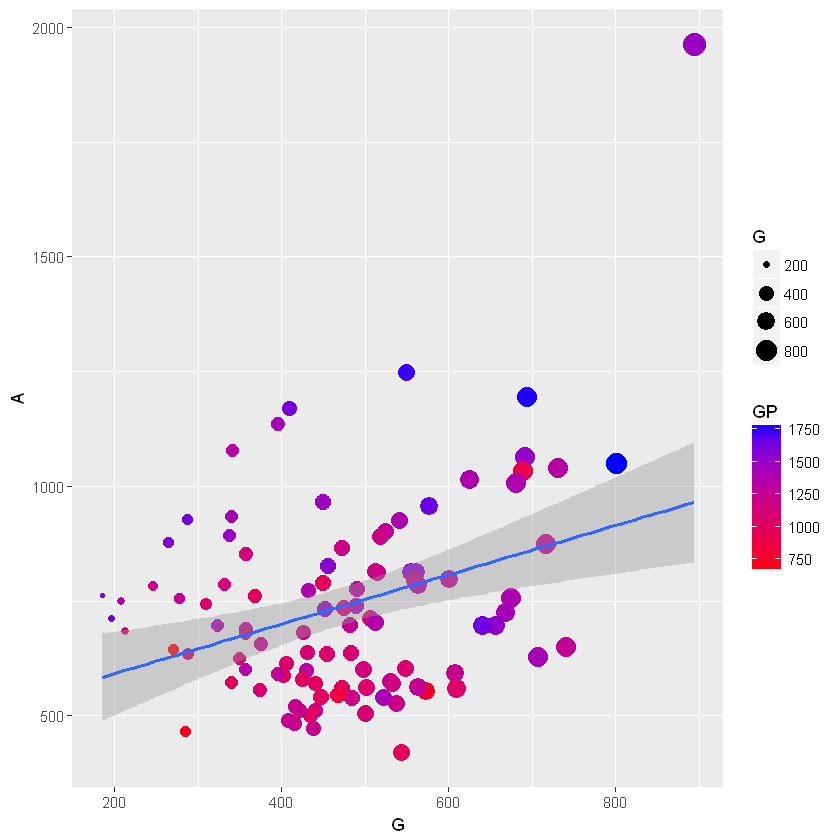

In [45]:
kane.lm.plot

In [46]:
kane.model <- lm(I(A-465) ~ I(G-285), data = data_kane)

In [47]:
kane.model


Call:
lm(formula = I(A - 465) ~ I(G - 285), data = data_kane)

Coefficients:
(Intercept)   I(G - 285)  
   172.7210       0.5377  


In [48]:
kane.coefs <- coef(kane.model)

In [49]:
kane.fit.plot <- kane.lm.plot + geom_abline(intercept = kane.coefs[1], slope = kane.coefs[2])

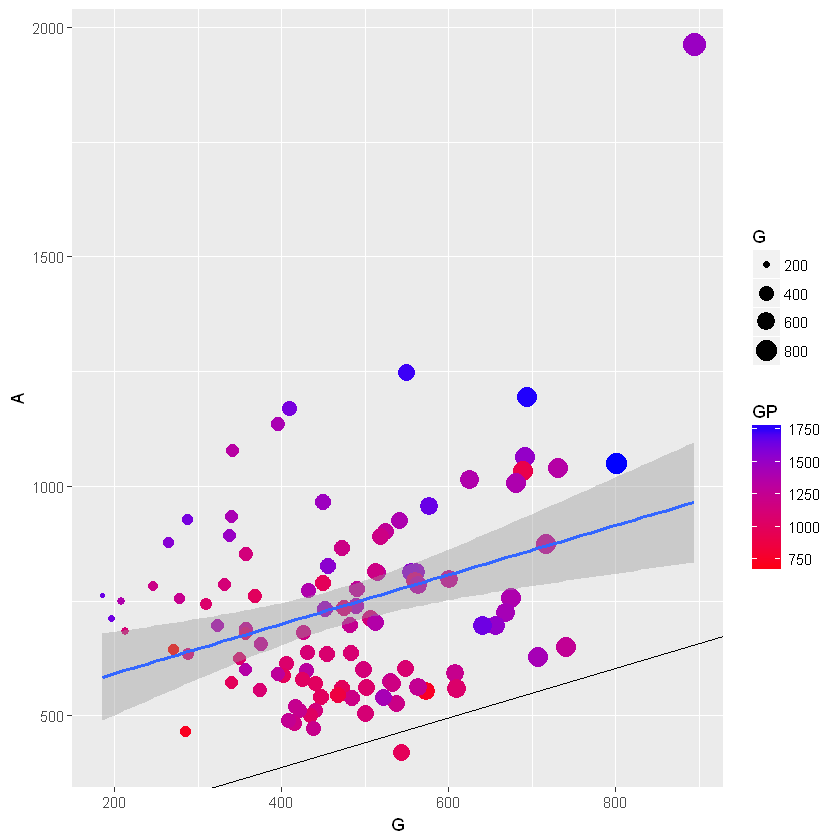

In [50]:
kane.fit.plot

#### Getting the Rsquared and p-values

In [51]:
summary(kane.model)


Call:
lm(formula = I(A - 465) ~ I(G - 285), data = data_kane)

Residuals:
    Min      1Q  Median      3Q     Max 
-355.98 -172.72   -8.94  126.20  997.84 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 172.7210    34.8505   4.956 2.97e-06 ***
I(G - 285)    0.5377     0.1492   3.603 0.000493 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 206.7 on 99 degrees of freedom
Multiple R-squared:  0.116,	Adjusted R-squared:  0.107 
F-statistic: 12.98 on 1 and 99 DF,  p-value: 0.0004934


In [52]:
kane.r2 <- summary(kane.model)$r.squared

In [53]:
kane.r2

[1] 0.1159517

In [54]:
kane.fstat <- summary(kane.model)$fstatistic

In [55]:
kane.p <- pf(kane.fstat[1], kane.fstat[2], kane.fstat[3], lower.tail = FALSE)

In [56]:
kane.p

value 
0.0004934439

#### Making all the models go through origin (0,0) and create new models for each. Noting the Rswaure and p-values of the fit.

In [64]:
default.0.model <- lm(A ~ G + 0, data = data)
default.0.model

summary(default.0.model)

default.0.r2 <- summary(default.0.model)$r.squared
default.0.fstat <- summary(default.0.model)$fstatistic
default.0.p <- pf(default.0.fstat[1], default.0.fstat[2], default.0.fstat[3], lower.tail = FALSE)

default.0.r2
default.0.p


Call:
lm(formula = A ~ G + 0, data = data)

Coefficients:
   G  
1.48  



Call:
lm(formula = A ~ G + 0, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-446.93 -137.40    1.88  159.73  639.58 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
G  1.48033    0.05009   29.55   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 247.9 on 99 degrees of freedom
Multiple R-squared:  0.8982,	Adjusted R-squared:  0.8972 
F-statistic: 873.4 on 1 and 99 DF,  p-value: < 2.2e-16


[1] 0.8981861

value 
6.490898e-51

In [65]:
gretsky.0.model <- lm(I(A - 1963) ~ I(G - 894) + 0, data = data)
gretsky.0.model
summary(gretsky.0.model)

gretsky.0.r2 <- summary(gretsky.0.model)$r.squared
gretsky.0.fstat <- summary(gretsky.0.model)$fstatistic
gretsky.0.p <- pf(gretsky.0.fstat[1], gretsky.0.fstat[2], gretsky.0.fstat[3], lower.tail = FALSE)

gretsky.0.r2
gretsky.0.p


Call:
lm(formula = I(A - 1963) ~ I(G - 894) + 0, data = data)

Coefficients:
I(G - 894)  
     2.685  



Call:
lm(formula = I(A - 1963) ~ I(G - 894) + 0, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-902.2 -333.4 -145.4  103.3  703.4 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
I(G - 894)   2.6847     0.0853   31.48   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 375.7 on 99 degrees of freedom
Multiple R-squared:  0.9091,	Adjusted R-squared:  0.9082 
F-statistic: 990.7 on 1 and 99 DF,  p-value: < 2.2e-16


[1] 0.9091456

value 
2.29826e-53

In [67]:
kane.0.model <- lm(I(A-465) ~ I(G-285) + 0, data = data_kane)
kane.0.model
summary(kane.0.model)

kane.0.r2 <- summary(kane.0.model)$r.squared
kane.0.fstat <- summary(kane.0.model)$fstatistic
kane.0.p <- pf(kane.0.fstat[1], kane.0.fstat[2], kane.0.fstat[3], lower.tail = FALSE)

kane.0.r2
kane.0.p


Call:
lm(formula = I(A - 465) ~ I(G - 285) + 0, data = data_kane)

Coefficients:
I(G - 285)  
     1.135  



Call:
lm(formula = I(A - 465) ~ I(G - 285) + 0, data = data_kane)

Residuals:
    Min      1Q  Median      3Q     Max 
-337.85 -114.55   40.53  165.99  807.05 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
I(G - 285)   1.1346     0.0979   11.59   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 229.8 on 100 degrees of freedom
Multiple R-squared:  0.5732,	Adjusted R-squared:  0.5689 
F-statistic: 134.3 on 1 and 100 DF,  p-value: < 2.2e-16


[1] 0.5731817

value 
3.394245e-20

In [75]:
result_default <- c(default.r2, default.p)
result_default

value 
0.1082305045 0.0008317169

In [76]:
result_gretsky <- c(gretsky.r2,gretsky.p)
result_gretsky

value 
0.1082305045 0.0008317169

In [77]:
result_kane <- c(kane.r2, kane.p)
result_kane

value 
0.1159516767 0.0004934439

In [78]:
result_default0 <- c(default.0.r2, default.0.p)
result_default0

value 
8.981861e-01 6.490898e-51

In [80]:
result_gretsky0 <- c(gretsky.0.r2,gretsky.0.p)
result_gretsky0

value 
9.091456e-01 2.298260e-53

In [81]:
result_kane0 <- c(kane.0.r2, kane.0.p)
result_kane0

value 
5.731817e-01 3.394245e-20

In [96]:
result <- rbind(result_default, result_gretsky, result_kane, result_default0, result_gretsky0, result_kane0)
result

,,value
result_default,0.1082305,8.317169e-04
result_gretsky,0.1082305,8.317169e-04
result_kane,0.1159517,4.934439e-04
result_default0,0.8981861,6.490898e-51
result_gretsky0,0.9091456,2.298260e-53
result_kane0,0.5731817,3.394245e-20


In [109]:
colnames(result) <- c("R-squared", "p-values")

In [113]:
rownames(result) <- c("Default", "Gretsky", "Kane", "Default through Origin", "Gretsky through Origin", "Kane through Origin")

In [114]:
result

,R-squared,p-values
Default,0.10823050447434,0.000831716923854345
Gretsky,0.10823050447434,0.000831716923854359
Kane,0.115951676728681,0.000493443901793566
Default through Origin,0.89818610880756,6.49089821934292e-51
Gretsky through Origin,0.909145627591712,2.298259679506e-53
Kane through Origin,0.573181712694336,3.39424539724717e-20


#### Observation :
#### <li>The R<sup>2</sup> value as close to 1 is better. It means we are in a position to better explain the variation by our model.</li>
#### <li>And p-values are better if they are lower, typically lesser than 0.05 (significance level). It describes how well fitting the intercept-only model and our model is</li>